In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Load haberman.csv into a pandas dataFrame.
haberman = pd.read_csv("haberman.csv")

In [2]:
print(haberman.shape)

(306, 4)


In [3]:
print(haberman.columns)

#['age','year','nodes']-Variables/Features
#['status']-->class label

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [4]:
haberman["status"].value_counts()

#Observation 1 : This is imbalanced dataset

1    225
2     81
Name: status, dtype: int64

Observation 1 : This is imbalanced dataset.

**Objective** : To identify which pair plot would be better to use in order identify the type of class better from another for analysis.

# Pair Plot

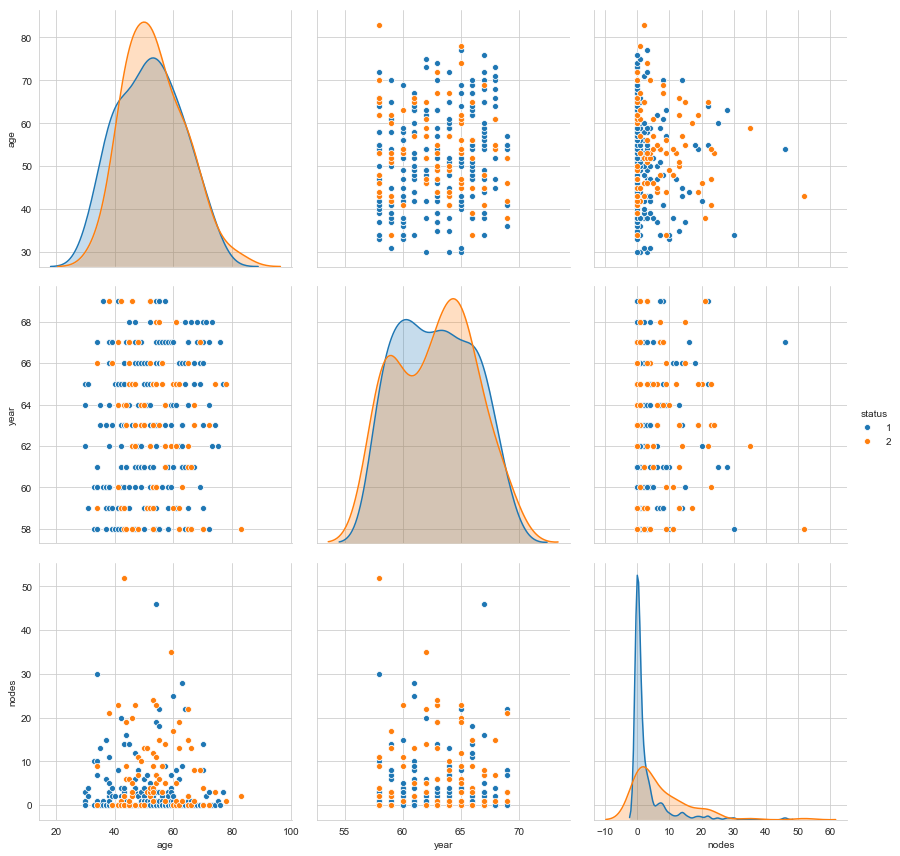

In [5]:

plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status",vars=["age","year","nodes"], height=4);
plt.show()

**Observation** :
1. It is really difficult to differentiate which plot is better since in each pair plot, both status 1 and status 2 is getting overlapped which making is difficult to classify.

# Histogram, PDF and CDF

# 1-D Scatter plot

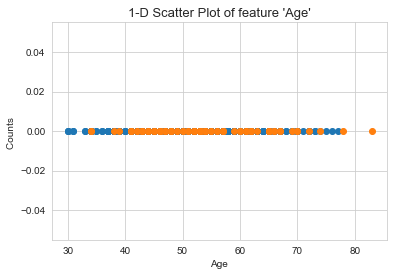

In [6]:
import numpy as np
haberman_one = haberman.loc[haberman["status"] == 1];
haberman_two = haberman.loc[haberman["status"] == 2];

plt.plot(haberman_one["age"], np.zeros_like(haberman_one['age']), 'o')
plt.plot(haberman_two["age"], np.zeros_like(haberman_two['age']), 'o')
plt.xlabel("Age ")
plt.ylabel("Counts ")
plt.title("1-D Scatter Plot of feature 'Age'", fontsize=13)


plt.show()


**Observation**:
1. In this 1-D scatter, it is very difficult to identity the number of points between the specific range. Hence, it is not useful in this case.

# Histogram and PDF

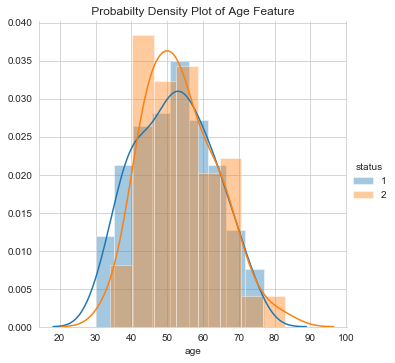

In [7]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title(" Probabilty Density Plot of Age Feature ")
plt.show();



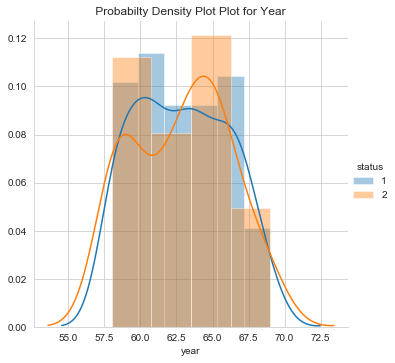

In [8]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title(" Probabilty Density Plot Plot for Year ")
plt.show();



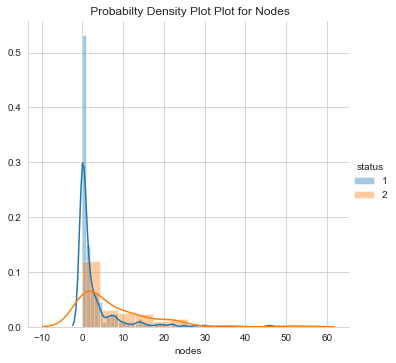

In [9]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title(" Probabilty Density Plot Plot for Nodes")
plt.show();



**Observations** :
1. From the above we can conclude that for each feature, the graphs are getting overlapped. Hence it is not possible to classify between status 1 and status 2.
2. Graph 3 which is for 'nodes', we can say that between nodes value '0' and '5', status 1 count is more as compare to status 2.

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


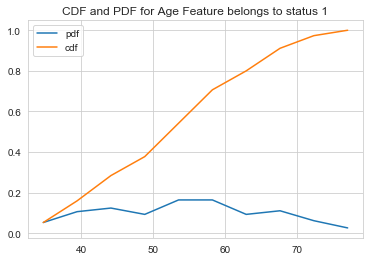

In [10]:
counts, bin_edges = np.histogram(haberman_one['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.gca().legend(('pdf','cdf'))

plt.title("CDF and PDF for Age Feature belongs to status 1")

plt.show();

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


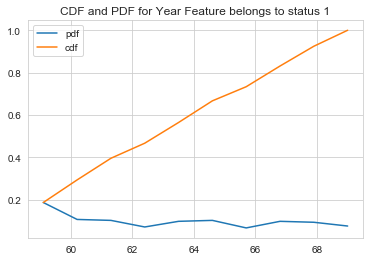

In [11]:
counts, bin_edges = np.histogram(haberman_one['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.gca().legend(('pdf','cdf'))
plt.title("CDF and PDF for Year Feature belongs to status 1")

plt.show();

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


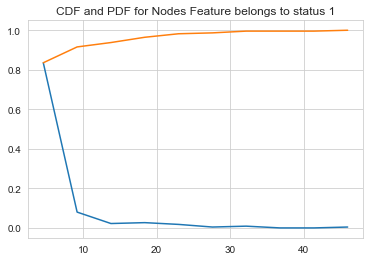

In [12]:
counts, bin_edges = np.histogram(haberman_one['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.title("CDF and PDF for Nodes Feature belongs to status 1")


plt.show();

**Observation** :

1. From the above CDF results we can conclude that 80 percent of patients with 'status 1' exists if 'age' is less than 60.
2. From the CDF of year, we can conclude that 80 percent of patient with 'status 1' exists if 'year' is less than 66.
3. From the graph 3, we can conclude that almots 100 percent of patient with 'status 1' if node value is greater than 20.

# CDF and PDF

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


Text(0.5, 1.0, 'CDF and PDF for Age Feature of Haberman Dataset')

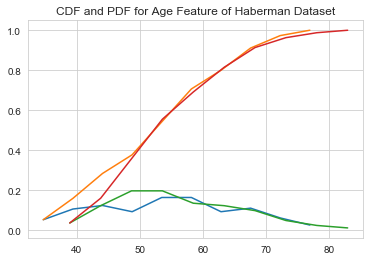

In [13]:
counts, bin_edges = np.histogram(haberman_one['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(haberman_two['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.title("CDF and PDF Plot for Age Feature of Haberman Dataset")



# Mean, Variance and Std-dev

In [14]:
#Mean, Variance, Std-deviation,  
print("Means:")

print(np.mean(haberman_one["age"]));
print(np.mean(haberman_two["age"]))
print(np.mean(haberman_one["year"]))
print(np.mean(haberman_two["year"]))

print("\nStd-dev:");
print(np.std(haberman_one["age"]))
print(np.std(haberman_two["age"]))




Means:
52.01777777777778
53.67901234567901
62.86222222222222
62.82716049382716

Std-dev:
10.98765547510051
10.10418219303131


# Median, Percentile, Quantile, IQR, MAD

In [15]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(haberman_one["age"]));
print(np.median(haberman_two["age"]))


print("\nQuantiles:")
print(np.percentile(haberman_one["age"],np.arange(0, 100, 25)))
print(np.percentile(haberman_two["age"],np.arange(0, 100, 25)))


print("\n90th Percentiles:")
print(np.percentile(haberman_one["age"],90))
print(np.percentile(haberman_two["age"],90))


from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman_one["age"]))
print(robust.mad(haberman_two["age"]))



Medians:
52.0
53.0

Quantiles:
[30. 43. 52. 60.]
[34. 46. 53. 61.]

90th Percentiles:
67.0
67.0

Median Absolute Deviation
13.343419966550417
11.860817748044816


# -> Box plot

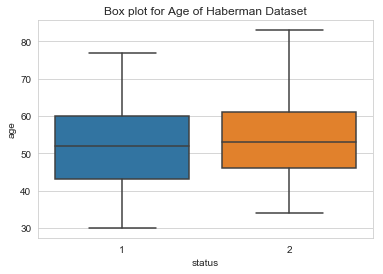

In [16]:

sns.boxplot(x='status',y='age', data=haberman)
plt.title("Box plot for Age of Haberman Dataset")
plt.show()

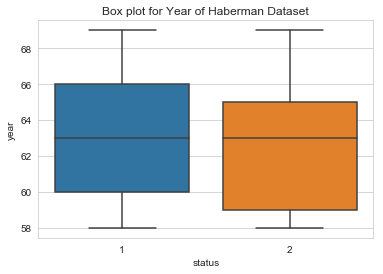

In [17]:
sns.boxplot(x='status',y='year', data=haberman)
plt.title("Box plot for Year of Haberman Dataset")
plt.show()

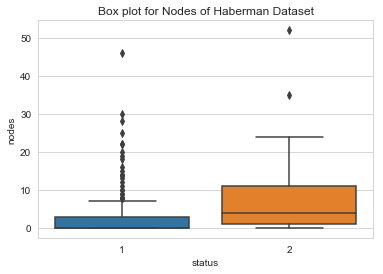

In [18]:
sns.boxplot(x='status',y='nodes', data=haberman)
plt.title("Box plot for Nodes of Haberman Dataset")
plt.show()

**Observation** :
1. For box plot of age feature, if age is almost less 45, then patient belongs to 'status 1'.
2. For box plot of year feature, if year is less than 60 then patient belongs to 'status 2' and if year is more than 65 then patient belongs to 'status 1'.
3. For box plot of nodes feature, if node is more than almost 4 and less than almost 8, then it belongs to 'Status 2'. Also, I can able to observe that if node value is between 11 and 35, then patient belongs to 'Status 2'.

# --> Whiskers

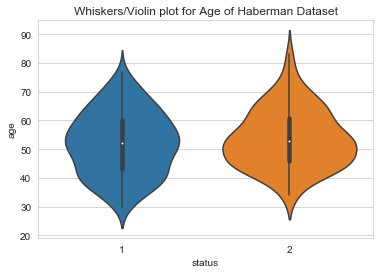

In [19]:
sns.violinplot(x='status',y='age', data=haberman)
plt.title("Whiskers/Violin plot for Age of Haberman Dataset")
plt.show()

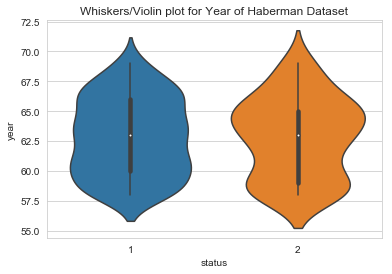

In [20]:
sns.violinplot(x='status',y='year', data=haberman)
plt.title("Whiskers/Violin plot for Year of Haberman Dataset")
plt.show()

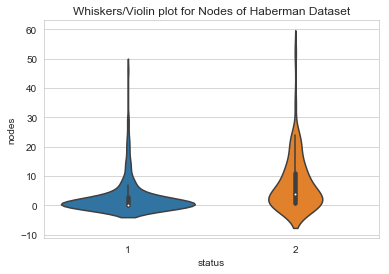

In [21]:
sns.violinplot(x='status',y='nodes', data=haberman)
plt.title("Whiskers/Violin plot for Nodes of Haberman Dataset")
plt.show()

**Observation(s)** :

1. There are 3 features in this dataset - age,year and nodes.
2. Class label in this dataset is - 'status' and Number of classes are two, one having status with value '1' and another with value '2'.
3. Number of datapoints are 306.
4. This is an imbalanced dataset.
5. In pair plot, we observed that None of the two feature is sufficient to differentiate one class from another.
5. From the all the above analysis, we can use box plot comparitively to get better results for classification.